In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [9]:
df['Ram']= df['Ram'].str.replace('GB', '')

In [10]:
df['Weight']= df['Weight'].str.replace('kg', '')

In [11]:
df['Ram']= df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')

In [12]:
import seaborn as sns

C:\Users\karis\AppData\Local\Temp\ipykernel_660\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

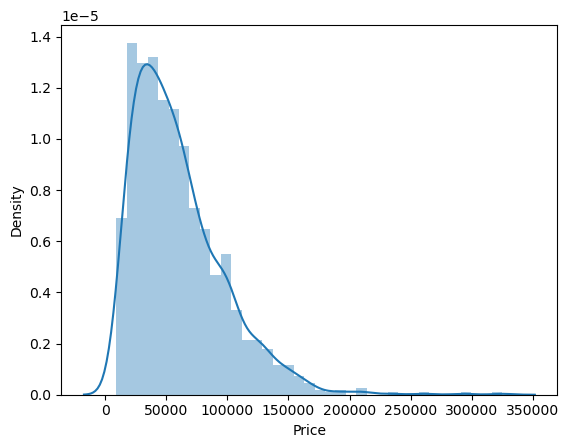

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

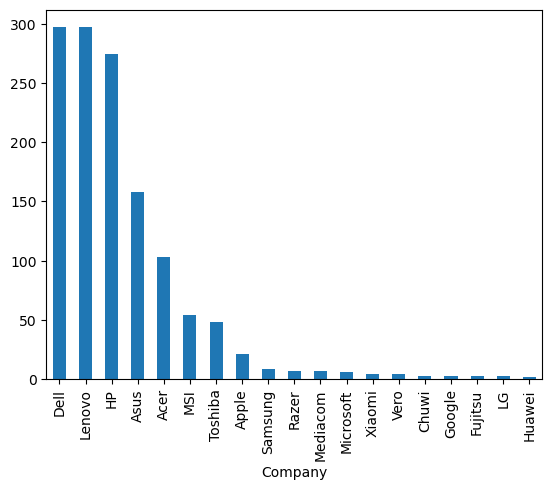

In [14]:
df['Company'].value_counts().plot(kind= 'bar')

In [15]:
import matplotlib.pyplot as plt

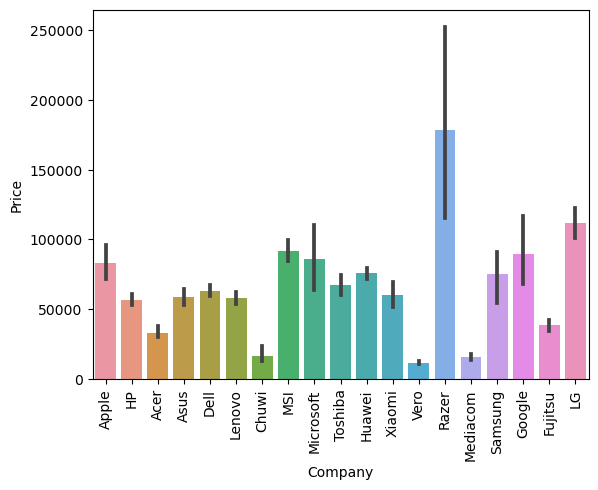

In [16]:
sns.barplot(x= df['Company'], y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

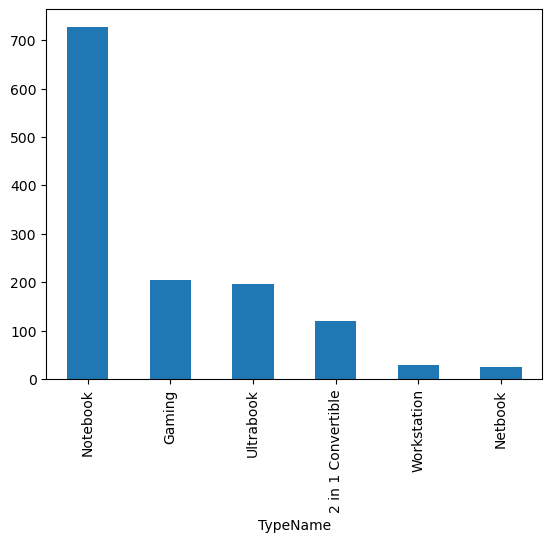

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

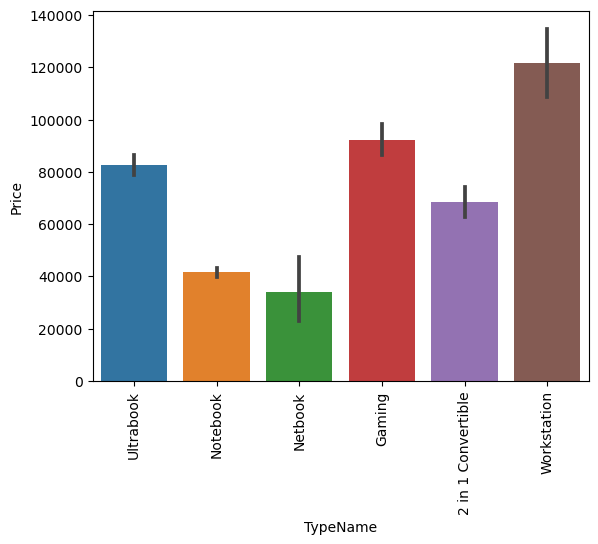

In [18]:
sns.barplot(x= df['TypeName'], y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

C:\Users\karis\AppData\Local\Temp\ipykernel_660\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Inches', ylabel='Density'>

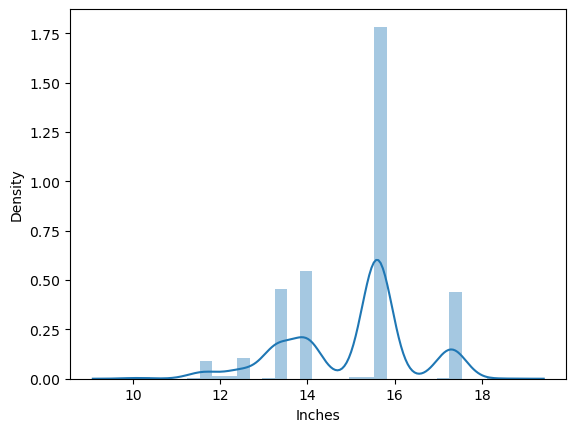

In [19]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

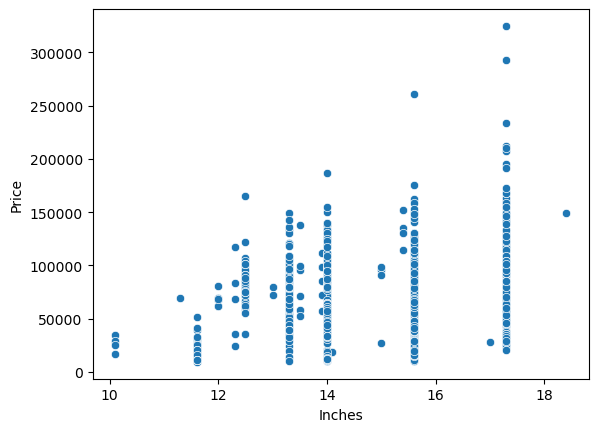

In [20]:
sns.scatterplot(x= df['Inches'], y= df['Price'])

In [21]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0) 

In [22]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

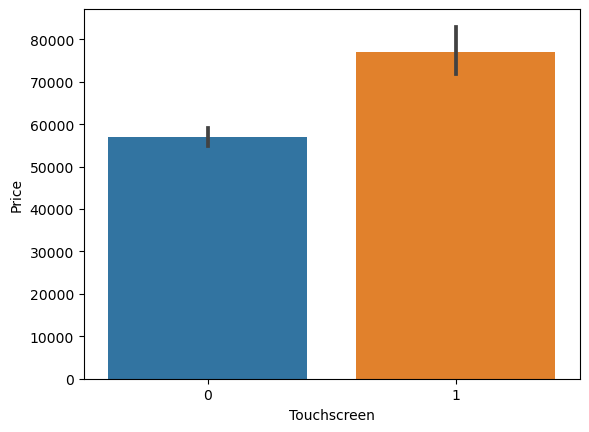

In [23]:
sns.barplot(x= df['Touchscreen'], y= df['Price'])

In [24]:
df['Ips']= df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0) 

In [25]:
df['Ips'].value_counts()

Ips
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='Ips', ylabel='Price'>

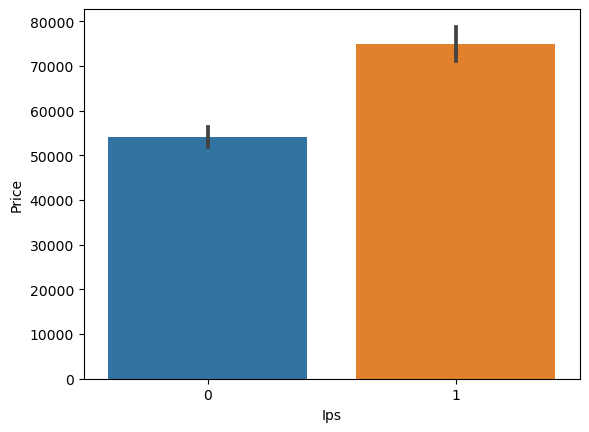

In [26]:
sns.barplot(x= df['Ips'], y= df['Price'])

In [27]:
new= df['ScreenResolution'].str.split('x', n=1, expand= True)

In [28]:
df['X_res']= new[0]
df['Y_res']= new[1]

In [29]:
df['X_res']= df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply (lambda x: x[0])

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [33]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [34]:
df['ppi']= (((df['X_res']**2)+ (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [35]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [36]:
df.drop(columns=['ScreenResolution'], inplace= True)

In [37]:
df.drop(columns=['Inches'], inplace= True)
df.drop(columns=['X_res'], inplace= True)
df.drop(columns=['Y_res'], inplace= True)

In [38]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [39]:
df['cpu_name']= df['Cpu'].apply(lambda x:" ".join( x.split()[0:3]))

In [40]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [41]:
def fetch_processor(text):
    if text== 'Intel Core i7' or text== 'Intel Core i3' or text== 'Intel Core i5':
        return text
    else:
        if text.split()[0]== 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

In [42]:
df['Cpu_brand']= df['cpu_name'].apply(fetch_processor) 

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

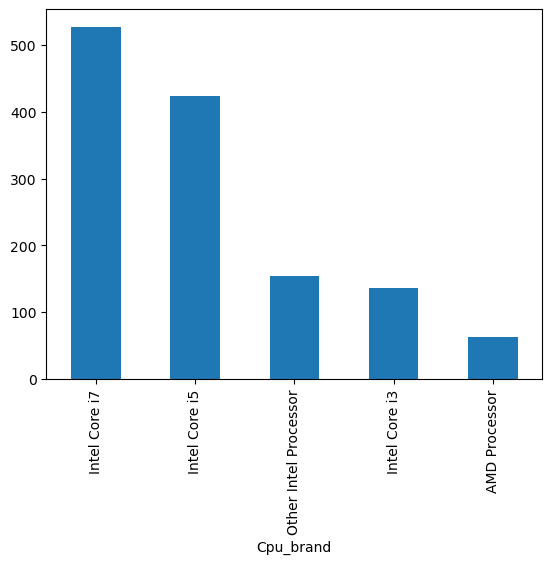

In [44]:
df['Cpu_brand'].value_counts().plot(kind='bar')

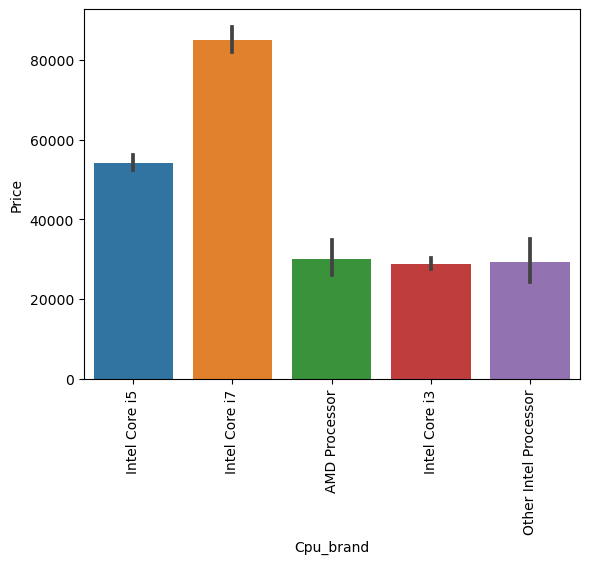

In [45]:
sns.barplot(x= df['Cpu_brand'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

In [46]:
df.drop(columns= ['Cpu', 'cpu_name'], inplace=True)

<Axes: xlabel='Ram'>

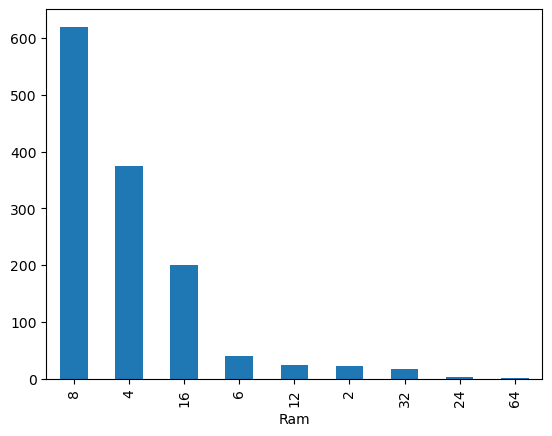

In [47]:
df['Ram'].value_counts().plot(kind='bar')

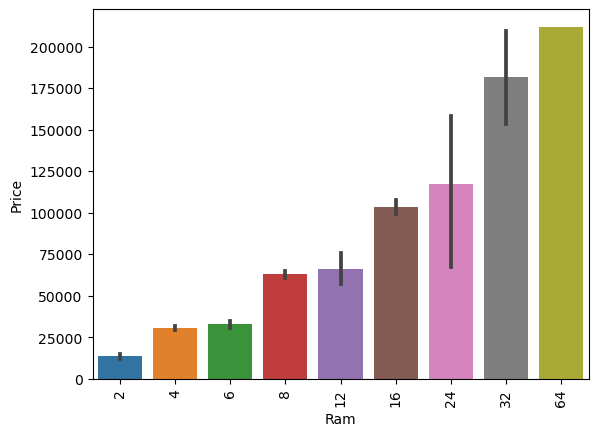

In [48]:
sns.barplot(x= df['Ram'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

In [49]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu_brand    1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


In [51]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [52]:
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

In [53]:
df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex= True)

In [54]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [55]:
df.drop(columns= ['Memory'], inplace= True)

In [56]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [57]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [58]:
df.drop(columns= ['Hybrid', 'Flash_Storage'], inplace= True)

In [59]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [60]:
df['Gpu_brand']=df['Gpu'].apply(lambda x : x.split()[0])

In [61]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [62]:
df= df[df['Gpu_brand'] !='ARM']

In [63]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

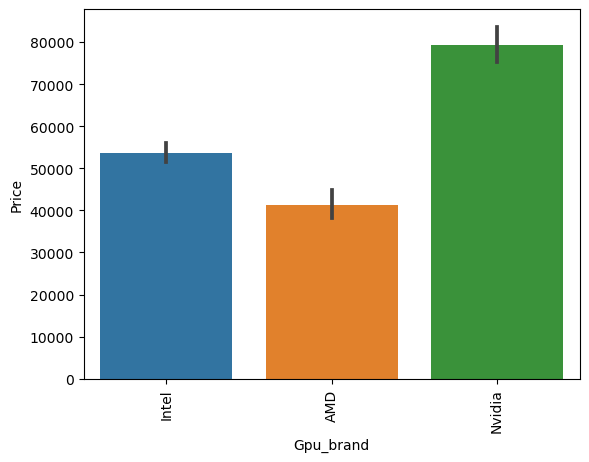

In [64]:
sns.barplot(x= df['Gpu_brand'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

In [65]:
df.drop(columns= ['Gpu'], inplace= True)

In [66]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

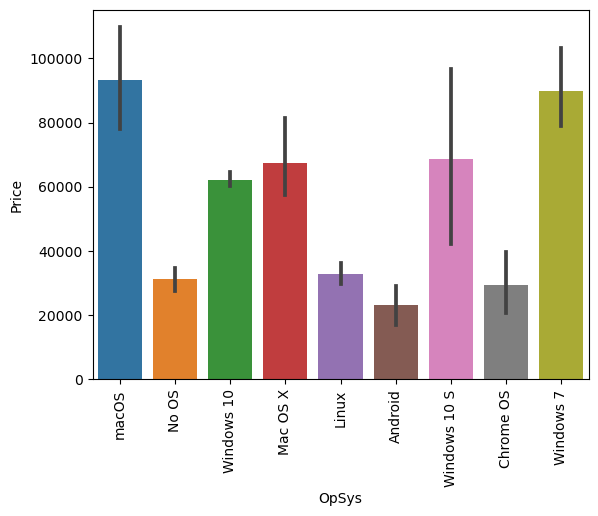

In [67]:
sns.barplot(x= df['OpSys'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

In [68]:
def cat_os(inp):
    if inp== 'Windows 10' or inp== 'Windows 7' or inp== 'Windows 10 S':
        return 'Windows'
    elif inp== 'macOS' or inp== 'MAC OS X':
        return 'Mac'
    else:
        return 'others/No OS/Linux'
        
        

In [69]:
df['OS']= df['OpSys'].apply(cat_os)

In [70]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [71]:
df.drop(columns= ['OpSys'], inplace= True)

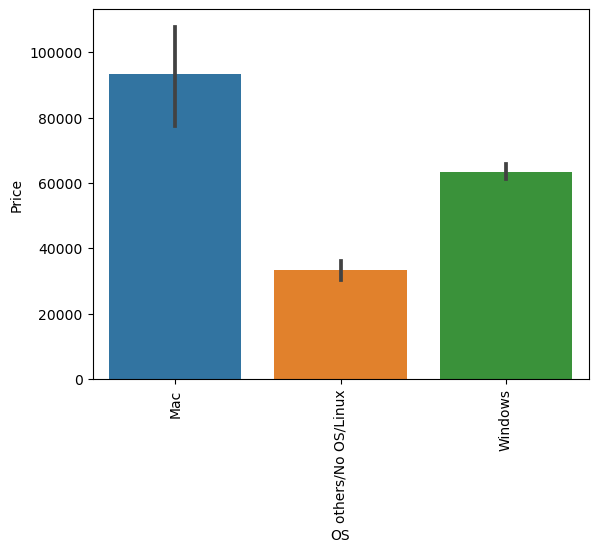

In [72]:
sns.barplot(x= df['OS'], y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

C:\Users\karis\AppData\Local\Temp\ipykernel_660\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

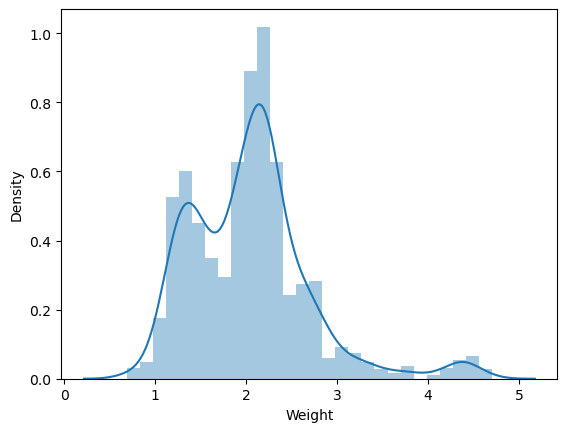

In [73]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

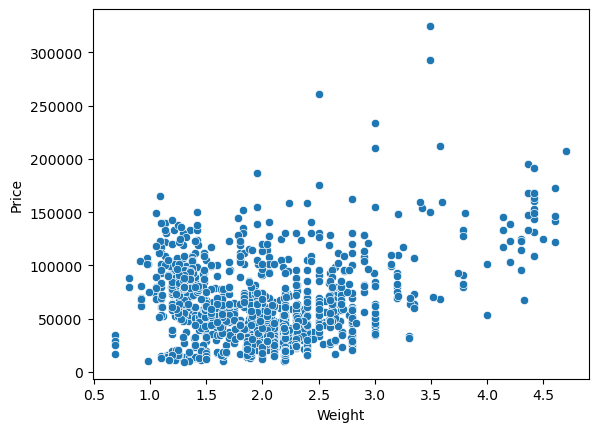

In [74]:
sns.scatterplot(x= df['Weight'], y= df['Price'])

In [75]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
0,8,1.37,71378.6832,0,1,226.983005,0,128
1,8,1.34,47895.5232,0,0,127.677940,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256
3,16,1.83,135195.3360,0,1,220.534624,0,512
4,8,1.37,96095.8080,0,1,226.983005,0,256
...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,0,128
1299,16,1.30,79866.7200,1,1,276.053530,0,512
1300,2,1.50,12201.1200,0,0,111.935204,0,0
1301,6,2.19,40705.9200,0,0,100.454670,1000,0


C:\Users\karis\AppData\Local\Temp\ipykernel_660\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
C:\Users\karis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

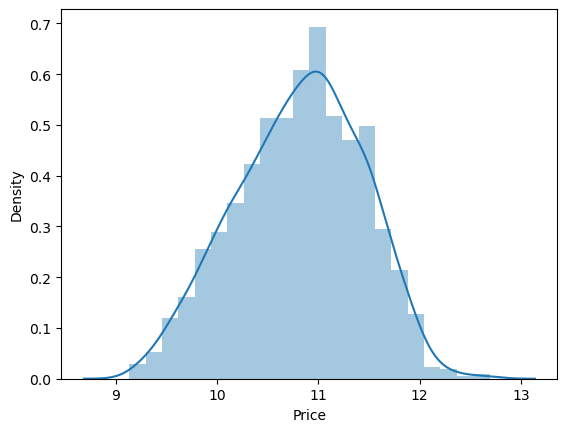

In [76]:
sns.distplot(np.log(df['Price']))

In [77]:
X= df.drop(columns= ['Price'])
y= np.log(df['Price'])

In [78]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [79]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,random_state= 42, test_size= 0.15)

In [81]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,OS
945,Lenovo,Gaming,16,2.50,0,1,141.211998,AMD Processor,1000,512,AMD,Windows
428,HP,Gaming,12,3.35,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
1261,Asus,Ultrabook,8,1.20,0,1,165.632118,Other Intel Processor,0,512,Intel,Windows
174,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i5,0,256,Nvidia,Windows
398,Dell,Workstation,8,1.78,1,0,282.423996,Intel Core i7,0,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia,Windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel,Windows
1295,Dell,Notebook,8,2.30,0,0,100.454670,Intel Core i7,1000,0,AMD,others/No OS/Linux
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel,Windows


In [82]:
!pip install xgboost

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error


In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [85]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= LinearRegression()

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score',  r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

r2_score 0.7926502962323774
MAE 0.21348349006526302


C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= KNeighborsRegressor(n_neighbors=3)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score',  r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.7351157910554116
MAE 0.23231094171422118


In [87]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= DecisionTreeRegressor(max_depth=8)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score',  r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

r2_score 0.8200676916131391
MAE 0.19457154279332564


C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= SVR(kernel= 'rbf',C=10000, epsilon= 0.1)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score',  r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.8127150425556244
MAE 0.1926175136585575


In [89]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features= 0.75, max_depth= 15)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score', r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.8519284034735715
MAE 0.17246329028160154


In [90]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features= 0.75, max_depth= 15, bootstrap= True)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score', r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.8478446446935535
MAE 0.1747673046694628


In [91]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= AdaBoostRegressor(n_estimators=15,learning_rate= 1.0)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score', r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

r2_score 0.7437043064280954
MAE 0.2498906825794748


C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [92]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= GradientBoostingRegressor(n_estimators=500)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score', r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.8573393436652266
MAE 0.1712091165111801


In [93]:
step1= ColumnTransformer(transformers= [
    ('col_tnf', OneHotEncoder(sparse= False, drop='first'), [0,1,7,10,11])
], remainder= 'passthrough')

step2= XGBRegressor(n_estimators=45, max_depth= 5, learning_rate=0.5)

pipe= Pipeline([('step1', step1), 
                ('step2', step2)])

pipe.fit(X_train, y_train)

y_pred= pipe.predict(X_test)

print('r2_score', r2_score(y_test, y_pred))
print('MAE',  mean_absolute_error(y_test, y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.8731249197297589
MAE 0.16287494750233


In [94]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8553040110179351
MAE 0.17240917959837962


In [95]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\karis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8500275429923112
MAE 0.18109227886041276


### Exporting the Model

In [96]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))
